<a href="https://colab.research.google.com/github/gabriellbragaa/Computer_Vision_Projs/blob/main/Lab04resolu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**01) Aplique a transformada de Hough para linhas e
círculos (verifique a documentação do OpenCV) de modo a localizar as placas presentes nas
imagens. Produza uma imagem diferente para cada um dos três modelos de placa.**

Em visão computacional, utilizamos a **transformada de Hough** para encontrar padrões em imagens, mesmo que imcompletas ou com ruídos. Ele detectar formas geométricas em imagens, como linhas, circulos..



Nessa atividade, temos como objetivo: **Localizar placas de carros**. Dependendo do design da placa, a transformada pode identificar.


Utlizamos o **Algoritmo de Canny** para detectar bordas, no qual usamos as métricas de **Threshold de histerese**, no qual serve para refinar as bordas detectadas e evitar que bordas fracas sejam perdidas ou ruídos sejam erraneamente interpretado como borda.

- Pixers com gradiente acima de 150 são bordas definitivas. E pixers com gradiente entre 50 e 150 serão mantidos apenas se estiverem mantidos a pixels de bordas forte. Pixers com gradiente abaixo de 50 serão descatados.

Saving museum3.jpg to museum3 (2).jpg


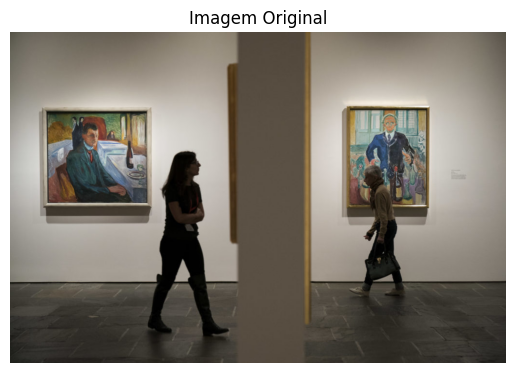

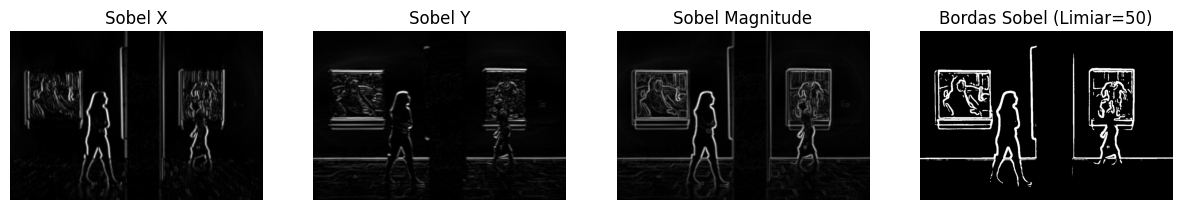

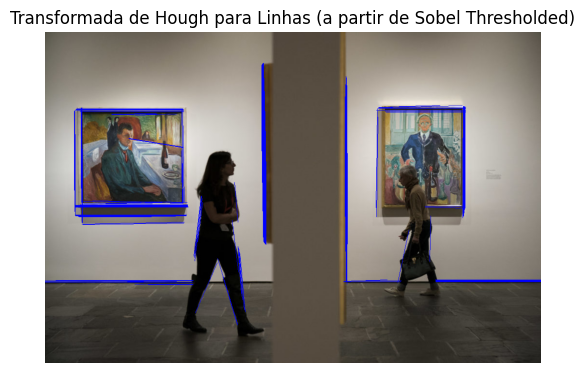

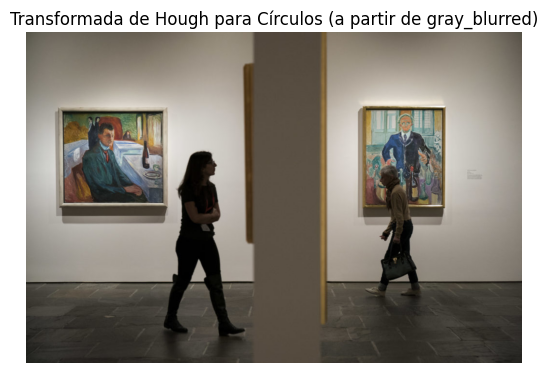

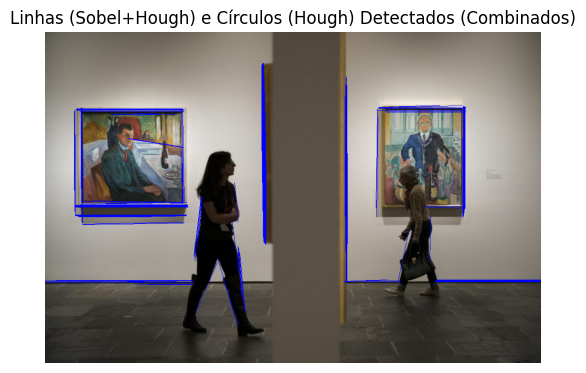

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Para carregar um arquivo
from google.colab import files
uploaded = files.upload()

filename = list(uploaded.keys())[0]

img = cv2.imread(filename)


if img is None:
    print("Erro ao carregar a imagem.")
else:

      # Exibir a imagem original
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Imagem Original')
    plt.axis('off')
    plt.show()

    # Converter para escala de cinza
    # Pois o algoritmo entende melhor na escala cinza para processar a intensidade dos pixes.
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_equalized = cv2.equalizeHist(gray)
    gray_blurred = cv2.GaussianBlur(gray_equalized, (15, 15), 0) # Kernel (15, 15)

    # --- Aplicar Filtro Sobel ---
    # Calcular gradientes nas direções X e Y
    # ddepth = -1 significa que a profundidade de saída será a mesma da entrada (CV_8U)
    # ksize = 3 é o tamanho do kernel Sobel (deve ser 1, 3, 5 ou 7)
    sobelx = cv2.Sobel(gray_blurred, cv2.CV_64F, 1, 0, ksize=3) # Gradiente na direção X
    sobely = cv2.Sobel(gray_blurred, cv2.CV_64F, 0, 1, ksize=3) # Gradiente na direção Y

    # Converter os resultados de Sobel para um formato visualizável (CV_8U)
    # É comum calcular a magnitude do gradiente
    sobelx_abs = cv2.convertScaleAbs(sobelx)
    sobely_abs = cv2.convertScaleAbs(sobely)

    # Magnitude total do gradiente (combina X e Y)
    sobel_magnitude = cv2.addWeighted(sobelx_abs, 0.7, sobely_abs, 0.7, 0)

    # Definir o valor do limiar para as bordas Sobel
    sobel_threshold_value = 50 # Adicionado: Define a variável antes de usá-la no título

    ret, sobel_edges = cv2.threshold(sobel_magnitude, sobel_threshold_value, 255, cv2.THRESH_BINARY) # Usando a variável
    # --------------------------------------------------------------

    # --- Visualizar os resultados do Sobel e as bordas thresholded ---
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1) # Alterado para 4 subplots
    plt.imshow(sobelx_abs, cmap='gray')
    plt.title('Sobel X')
    plt.axis('off')

    plt.subplot(1, 4, 2) # Alterado para 4 subplots
    plt.imshow(sobely_abs, cmap='gray')
    plt.title('Sobel Y')
    plt.axis('off')

    plt.subplot(1, 4, 3) # Alterado para 4 subplots
    plt.imshow(sobel_magnitude, cmap='gray')
    plt.title('Sobel Magnitude')
    plt.axis('off')

    plt.subplot(1, 4, 4) # Novo subplot para bordas thresholded
    plt.imshow(sobel_edges, cmap='gray')
    plt.title(f'Bordas Sobel (Limiar={sobel_threshold_value})')
    plt.axis('off')

    plt.show()
    # -----------------------------------------------------------------


    # Parâmetros da Transformada de Hough para linhas (Probabilística)
    minLineLength = 80
    maxLineGap = 5


    # --- Aplicar a Transformada de Hough para linhas usando 'sobel_edges' ---
    lines = cv2.HoughLinesP(sobel_edges, 1, np.pi/180, 150, minLineLength=minLineLength, maxLineGap = maxLineGap )
    # ----------------------------------------------------------------------

    # np.pi/180 = Resolução do acumulador em radianos theta.
    # hough_threshold_lines = Threshold de votos.

    if lines is not None:
        for idx, line in enumerate(lines):
            x1, y1, x2, y2 = line[0]



    img_circulos = img.copy()


    circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 50,
                               param1=60, param2=50, minRadius=1, maxRadius=70)

    # radium é o tamanho do raio em pixies

    # Imprimir as constantes dos círculos detectados (centro, raio)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for idx, i in enumerate(circles[0, :]):
            x, y, r = i


    # Criar cópias da imagem para desenhar os resultados
    img_linhas = img.copy() # Imagem para mostrar apenas linhas (a partir de Sobel)
    img_combinada = img.copy()


    # Desenhar as linhas encontradas (a partir de Sobel thresholded)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0] # Desempacotar as quatro coordenadas
            cv2.line(img_linhas, (x1, y1), (x2, y2), (255, 0, 0), 1) # Linha azul na separada
            cv2.line(img_combinada, (x1, y1), (x2, y2), (255, 0, 0), 1) # Linha azul na combinada

    # Se círculos forem encontrados, desenhe-os
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(img_circulos, (i[0], i[1]), i[2], (255, 255, 0), 2) # Círculo externo verde na separada
            cv2.circle(img_combinada, (i[0], i[1]), i[2], (0, 255, 255), 2) # Círculo externo verde na combinada



    # Exibir as imagens

    plt.imshow(cv2.cvtColor(img_linhas, cv2.COLOR_BGR2RGB))
    plt.title('Transformada de Hough para Linhas (a partir de Sobel Thresholded)')
    plt.axis('off')
    plt.show()

    plt.imshow(cv2.cvtColor(img_circulos, cv2.COLOR_BGR2RGB))
    plt.title('Transformada de Hough para Círculos (a partir de gray_blurred)')
    plt.axis('off')
    plt.show()

    plt.imshow(cv2.cvtColor(img_combinada, cv2.COLOR_BGR2RGB))
    plt.title('Linhas (Sobel+Hough) e Círculos (Hough) Detectados (Combinados)')
    plt.axis('off')
    plt.show()